In [2]:
import pandas as pd
import numpy as np
from calibration_utils import plot_mean_reliability_curve, print_ece_brier_stats, compute_risk_bins, plot_risk_bins

# Claibration Curves

In [5]:
path_prefix = 'inputs/random_esm2_mlp1_predictions'
fold0_preds_val = pd.read_csv(f'{path_prefix}/fold_0/val_fold_0_predict.csv')
fold1_preds_val  = pd.read_csv(f'{path_prefix}/fold_1/val_fold_1_predict.csv')
fold2_preds_val  = pd.read_csv(f'{path_prefix}/fold_2/val_fold_2_predict.csv')
fold3_preds_val  = pd.read_csv(f'{path_prefix}/fold_3/val_fold_3_predict.csv')
fold4_preds_val  = pd.read_csv(f'{path_prefix}/fold_4/val_fold_4_predict.csv')
fold0_preds_train = pd.read_csv(f'{path_prefix}/fold_0/train_fold_0_predict.csv')
fold1_preds_train  = pd.read_csv(f'{path_prefix}/fold_1/train_fold_1_predict.csv')
fold2_preds_train  = pd.read_csv(f'{path_prefix}/fold_2/train_fold_2_predict.csv')
fold3_preds_train  = pd.read_csv(f'{path_prefix}/fold_3/train_fold_3_predict.csv')
fold4_preds_train  = pd.read_csv(f'{path_prefix}/fold_4/train_fold_4_predict.csv')
fold0_preds = pd.read_csv(f'{path_prefix}/fold_0/test_set_predict.csv')
fold1_preds = pd.read_csv(f'{path_prefix}/fold_1/test_set_predict.csv')
fold2_preds = pd.read_csv(f'{path_prefix}/fold_2/test_set_predict.csv')
fold3_preds = pd.read_csv(f'{path_prefix}/fold_3/test_set_predict.csv')
fold4_preds = pd.read_csv(f'{path_prefix}/fold_4/test_set_predict.csv')

In [6]:
# Test set for calbration curve
all_y_true = []
all_y_proba = []
for df in [fold0_preds, fold1_preds, fold2_preds, fold3_preds, fold4_preds]:
    all_y_true.append(df['labels'])
    all_y_proba.append(df['probabilities'])

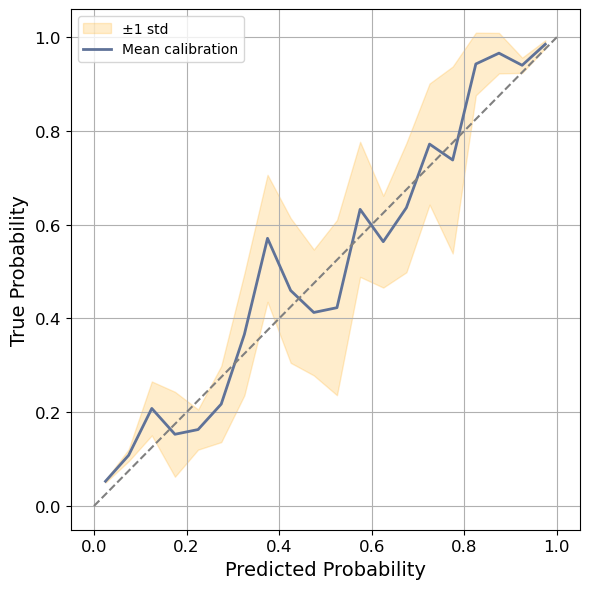

In [7]:
plot_mean_reliability_curve(all_y_true, all_y_proba)

In [8]:
eces, briers = print_ece_brier_stats(all_y_true, all_y_proba)

Fold 0 ECE: 0.0599  |  Brier score: 0.0854
Fold 1 ECE: 0.0507  |  Brier score: 0.0828
Fold 2 ECE: 0.0550  |  Brier score: 0.0883
Fold 3 ECE: 0.0409  |  Brier score: 0.0913
Fold 4 ECE: 0.0472  |  Brier score: 0.0885

Mean ECE across folds:   0.0508
Mean Brier score across folds: 0.0873


In [9]:
# Use all sets to estimate risk bins
all_df_list = [fold0_preds, fold1_preds, fold2_preds, fold3_preds, fold4_preds,
              fold0_preds_val, fold1_preds_val, fold2_preds_val, fold3_preds_val, fold4_preds_val,
              fold0_preds_train, fold1_preds_train, fold2_preds_train, fold3_preds_train, fold4_preds_train]
all_set_y_true = []
all_set_y_proba = []
for df in all_df_list:
    all_set_y_true.append(df['labels'])
    all_set_y_proba.append(df['probabilities'])

In [10]:
risk_df = compute_risk_bins(np.concatenate(all_set_y_true), np.concatenate(all_set_y_proba))

         Bin  Mean_N  Mean_Pred_Prob  Observed_Positive_Rate Risk_Label
0  0.00–0.10  1647.0        0.035053                0.019427   Very Low
1  0.10–0.30   500.0        0.173705                0.137600        Low
2  0.30–0.60   281.0        0.445188                0.476868     Medium
3  0.60–0.90   501.0        0.786572                0.844037       High
4  0.90–1.00  1150.0        0.967023                0.978616  Very High


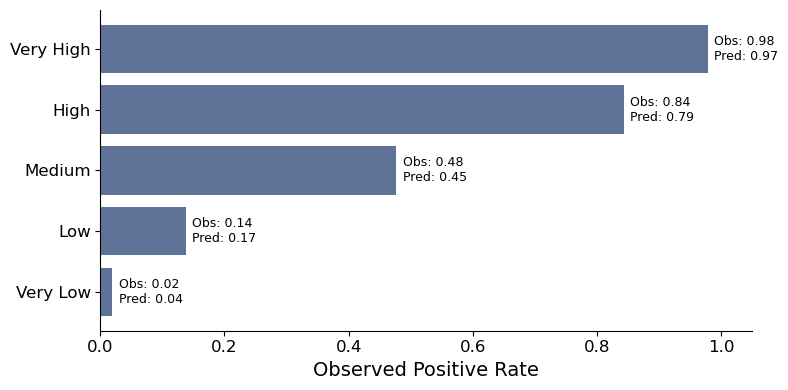

In [11]:
plot_risk_bins(risk_df)